Enter intial speed (m/s) and angle (°) above the horizontal (v_i,θ):  29,37.5


The flight time of the object is 3.603 seconds
At 0.000 seconds the range is 0.000 meters and the height is 0.000 meters
At 0.240 seconds the range is 5.526 meters and the height is 3.958 meters
At 0.480 seconds the range is 11.052 meters and the height is 7.350 meters
At 0.721 seconds the range is 16.578 meters and the height is 10.177 meters
At 0.961 seconds the range is 22.105 meters and the height is 12.438 meters
At 1.201 seconds the range is 27.631 meters and the height is 14.135 meters
At 1.441 seconds the range is 33.157 meters and the height is 15.265 meters
At 1.681 seconds the range is 38.683 meters and the height is 15.831 meters
At 1.922 seconds the range is 44.209 meters and the height is 15.831 meters
At 2.162 seconds the range is 49.735 meters and the height is 15.265 meters
At 2.402 seconds the range is 55.261 meters and the height is 14.135 meters
At 2.642 seconds the range is 60.788 meters and the height is 12.438 meters
At 2.882 seconds the range is 66.314 meters an

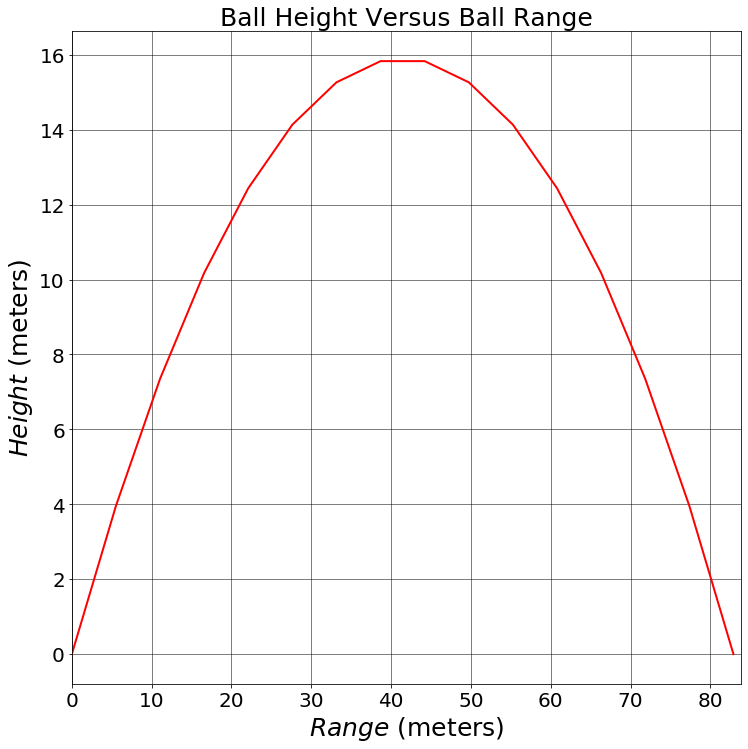

In [94]:
from pylab import *
g = 9.8

def flight_time(v_i,θ):
    if v_i > 0 and θ > 0 and θ < 90:
        flight_time = (2*v_i*sin(θ*pi/180))/g 
        print('The flight time of the object is %.3f seconds' %(flight_time))
    elif v_i < 0 and θ > 0 and θ < 90 :
        raise ValueError('\033[1;31;48mSpeed cannot be negative \n')
    elif v_i==0:
        raise ValueError('Speed must be greater than 0 m/s')
    elif v_i == inf:
        raise ValueError('Speed must be less than infinity m/s') #Does not work
    elif θ <= 0 or θ >= 90:
        raise ValueError('\033[1;31;48mThe angle cannot be less than or equal to 0 degrees or greater than or equal to 90 degrees \n')
    elif ((2*v_i*sin(θ*pi/180))/g) <= 0:
           raise ValueError('\033[1;31;48mThe angle cannot be less than or equal to 0 degrees or greater than or equal to 90 degrees \n')
    return flight_time
v_i, θ = eval(input('Enter intial speed (m/s) and angle (°) above the horizontal (v_i,θ): '))

t_f=flight_time(v_i,θ)
time=linspace(0.0,t_f,16)

def ball_wall(v_i,θ):
    time2 = (100)/(v_i*cos(θ * pi/180))
    ball_wall=((time2* v_i*sin(θ * pi/180)) - ((g/2)*(time2**2)))
    return ball_wall

BW=ball_wall(v_i,θ)
T2=(100)/(v_i*cos(θ * pi/180))

X_Range = (time*v_i*cos(θ * pi/180))
Y_Height = ((time* v_i*sin(θ * pi/180)) - ((1/2)*g*(time**2)))

def position():
    P = 0
    while P < 16:
        print('At %.3f seconds the range is %.3f meters and the height is %.3f meters' %(time[P],X_Range[P],Y_Height[P]))
        P +=1
        if P==15 and X_Range[P] <= 100:
            if Y_Height[P] < 0:
                Y_Height[P] = 0
            print('At %.3f seconds the range is %.3f meters and the height is %.3f meters' %(time[P],X_Range[P],Y_Height[P]))
            print('The ball hit the ground!')
            break
        elif X_Range[P] > 100:
            print('At %.3f seconds the range is %.3f meters and the height is %.3f meters' %(T2,100,BW))
            if BW > 8:
                print('Home Run!')
                break
            elif BW <= 8:
                print('The ball hit the wall')
                break
    return position
P_F=position()

def plotting():
    if BW >= 0:
        fig1 = figure(figsize=(12,12));
        #ax = fig1.add_subplot(111, aspect='equal')
        xlim(0,100)
        rcParams.update({'font.size': 20})
        title('Ball Height Versus Ball Range', fontsize=25)
        xlabel('$Range$ (meters)', fontsize=25)
        ylabel('$Height$ (meters)', fontsize=25)
        grid(color='black', linestyle='-', linewidth=.5)
        plot(X_Range,Y_Height,color='red',linewidth=2,label='Ball Path')
        vlines(100, 0, 8, colors='cyan', linestyles='-',linewidth=8,label='Wall')
        legend(loc='best',fontsize=15)
        #savefig('Henry_Wahhab_Lab11_HeightversusRange.png', bbox_inches = 'tight')
    elif BW < 0:
        fig1 = figure(figsize=(12,12));
        #ax = fig1.add_subplot(111, aspect='equal')
        xlim(0,X_Range[15]+1)
        rcParams.update({'font.size': 20})
        title('Ball Height Versus Ball Range', fontsize=25)
        xlabel('$Range$ (meters)', fontsize=25)
        ylabel('$Height$ (meters)', fontsize=25)
        grid(color='black', linestyle='-', linewidth=.5)
        plot(X_Range,Y_Height,color='red',linewidth=2,label='Ball Path')
        if X_Range[15]+1 >= 100:       
            vlines(100, 0, 8, colors='cyan', linestyles='-',linewidth=5,label='Wall')
            legend(loc='best',fontsize=15)
        #savefig('Henry_Wahhab_Lab11_HeightversusRangeGraph.png', bbox_inches = 'tight')
    return plotting

BallPlot=plotting()